In [2]:
%matplotlib widget

# Taller 05

Estudiante: Anthony Alangasí

Grupo: GR1CC

Fecha: 14/12/2025

## Mínimos cuadrados

A) Interpole los puntos:

$p1 = (5.4, 3.2)$

$p2_i = (9.5, 0.7)$

$p3 = (12.3, -3.6)$

De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos. 

### Solución

In [4]:
import numpy as np

def resolver_minimos_cuadrados(x, y, grado):
    m = grado + 1
    matriz_A = np.zeros((m, m))
    matriz_b = np.zeros(m)
    
    for i in range(m):
        matriz_b[i] = np.sum(y * (x**i))
        for j in range(m):
            matriz_A[i, j] = np.sum(x**(i + j))
            
    
    return np.linalg.solve(matriz_A, matriz_b)

x_puntos = np.array([5.4, 9.5, 12.3])
y_puntos = np.array([3.2, 0.7, -3.6])
grado_polinomio = 2

coeficientes = resolver_minimos_cuadrados(x_puntos, y_puntos, grado_polinomio)

if coeficientes is not None:
    print(f"Puntos de entrada: x={x_puntos}, y={y_puntos}")
    print(f"Grado del polinomio: {grado_polinomio}")
 
    print("\n--- Solución ---")
    print(f"Vector de Coeficientes [a0, a1, ..., an]: {coeficientes}")
    print(f"Polinomio de Ajuste: P(x) = {coeficientes[0]:.4f} + {coeficientes[1]:.4f}x + {coeficientes[2]:.4f}x^2")

Puntos de entrada: x=[ 5.4  9.5 12.3], y=[ 3.2  0.7 -3.6]
Grado del polinomio: 2

--- Solución ---
Vector de Coeficientes [a0, a1, ..., an]: [-0.39161491  1.3897768  -0.13419684]
Polinomio de Ajuste: P(x) = -0.3916 + 1.3898x + -0.1342x^2


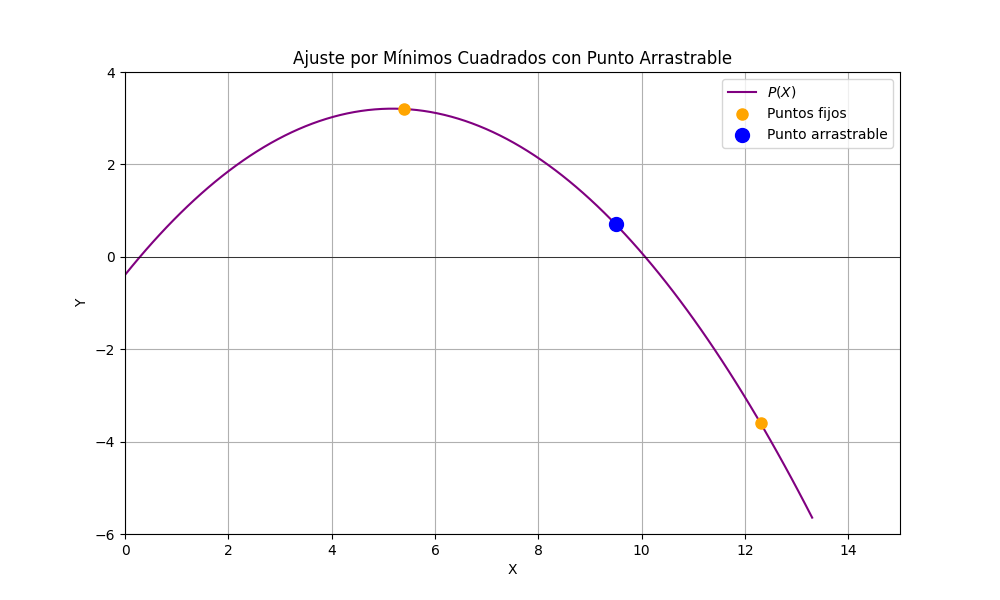

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class PuntoArrastrable:
    def __init__(self, ax, line_fijos, line_movible, line_ajuste, x_puntos, y_puntos, grado_polinomio):
        self.ax = ax
        self.line_fijos = line_fijos
        self.line_movible = line_movible
        self.line_ajuste = line_ajuste
        self.x_puntos = x_puntos
        self.y_puntos = y_puntos
        self.grado_polinomio = grado_polinomio
        self.grabbed = False
        self.tolerance = 0.5 
        
        line_movible.figure.canvas.mpl_connect('button_press_event', self.on_press)
        line_movible.figure.canvas.mpl_connect('button_release_event', self.on_release)
        line_movible.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)
        
        self.reajustar_y_graficar()

    def on_press(self, event):
        if event.inaxes != self.ax: return
        
        dist_sq = (self.x_puntos[1] - event.xdata)**2 + (self.y_puntos[1] - event.ydata)**2
        
        if dist_sq < self.tolerance:
            self.grabbed = True
            self.line_movible.set_markerfacecolor('red')
            self.ax.figure.canvas.draw_idle()

    def on_motion(self, event):
        if not self.grabbed: return
        if event.inaxes != self.ax: return
        
        self.x_puntos[1] = event.xdata
        self.y_puntos[1] = event.ydata
        
        x_new = np.array([self.x_puntos[1]])
        y_new = np.array([self.y_puntos[1]])
        
        self.line_movible.set_data(x_new, y_new)
        
        self.reajustar_y_graficar()
        self.ax.figure.canvas.draw_idle()

    def on_release(self, event):
        if self.grabbed:
            self.grabbed = False
            self.line_movible.set_markerfacecolor('blue')
            self.ax.figure.canvas.draw_idle()
            print(f"Punto (9.5, 0.7) movido a: ({self.x_puntos[1]:.2f}, {self.y_puntos[1]:.2f})")

    def reajustar_y_graficar(self):
        coefs = resolver_minimos_cuadrados(self.x_puntos, self.y_puntos, self.grado_polinomio)
        
        if coefs is None or len(coefs) == 0:
            return

        x_fit = np.linspace(0, self.x_puntos.max() + 1, 100)
        y_fit = np.polyval(coefs[::-1], x_fit) 
        
        self.line_ajuste.set_data(x_fit, y_fit)

x_puntos = np.array([5.4, 9.5, 12.3])
y_puntos = np.array([3.2, 0.7, -3.6])
grado_polinomio = 2

fig, ax = plt.subplots(figsize=(10, 6))

line_ajuste, = ax.plot([], [], label='$P(X)$', color='purple', linestyle='-')

x_fijos = np.array([x_puntos[0], x_puntos[2]])
y_fijos = np.array([y_puntos[0], y_puntos[2]])
line_fijos, = ax.plot(
    x_fijos, 
    y_fijos, 
    color='orange', 
    marker='o', 
    markersize=8,
    linestyle='',
    label='Puntos fijos'
)

x_movible = np.array([x_puntos[1]]) 
y_movible = np.array([y_puntos[1]]) 
line_movible, = ax.plot(
    x_movible, 
    y_movible, 
    color='blue', 
    marker='o', 
    markersize=10, 
    linestyle='',
    label='Punto arrastrable'
)

ax.set_title('Ajuste por Mínimos Cuadrados con Punto Arrastrable')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)
ax.set_ylim(-6, 4)
ax.set_xlim(0, 15)
ax.legend()

drag_manager = PuntoArrastrable(ax, line_fijos, line_movible, line_ajuste, x_puntos, y_puntos, grado_polinomio)

plt.show()

B) Interpole el siguiente conjunto de datos:

$xs = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344
]$

$ys = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077
]$

### Solución

Primero, se grafica el conjunto de datos dado para observar la tendencia de los puntos con la finalidad de elegir el grado del polinomio adecuado para el ajuste por mínimos cuadrados.

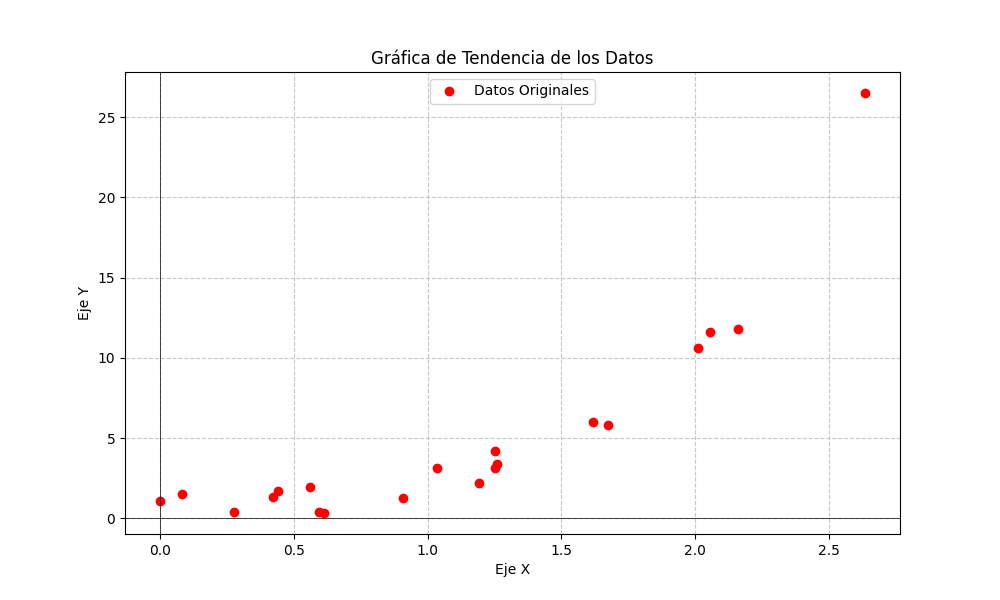

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_puntos = np.array([0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367, 
                     1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344])
y_puntos = np.array([1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239, 
                     2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077])

plt.figure(figsize=(10, 6))

plt.plot(
    x_puntos,
    y_puntos,
    'ro',
    markersize=6,
    label='Datos Originales'
)

plt.title('Gráfica de Tendencia de los Datos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

Como se muestra en la gráfica, los puntos siguen una tendencia cuadrática, por lo que se elige un polinomio de grado 2 para el ajuste.

In [7]:
x_puntos = np.array([0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367, 
                     1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344])
y_puntos = np.array([1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239, 
                     2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077])
grado_polinomio = 2

coeficientes = resolver_minimos_cuadrados(x_puntos, y_puntos, grado_polinomio)

if coeficientes is not None:
    print(f"Puntos de entrada: x={x_puntos}, \n y={y_puntos}")
    print(f"Grado del polinomio: {grado_polinomio}")
 
    print("\n--- Solución ---")
    print(f"Vector de Coeficientes [a0, a1, ..., an]: {coeficientes}")
    print(f"Polinomio de Ajuste: P(x) = {coeficientes[0]:.4f} + {coeficientes[1]:.4f}x + {coeficientes[2]:.4f}x^2")

Puntos de entrada: x=[3.0000e-04 8.2200e-02 2.7700e-01 4.2120e-01 4.4030e-01 5.5880e-01
 5.9430e-01 6.1340e-01 9.0700e-01 1.0367e+00 1.1903e+00 1.2511e+00
 1.2519e+00 1.2576e+00 1.6165e+00 1.6761e+00 2.0114e+00 2.0557e+00
 2.1610e+00 2.6344e+00], 
 y=[ 1.1017  1.5021  0.3844  1.3251  1.7206  1.9453  0.3894  0.3328  1.2887
  3.1239  2.1778  3.1078  4.1856  3.364   6.033   5.8088 10.589  11.5865
 11.8221 26.5077]
Grado del polinomio: 2

--- Solución ---
Vector de Coeficientes [a0, a1, ..., an]: [ 2.50678946 -6.62272516  5.5731795 ]
Polinomio de Ajuste: P(x) = 2.5068 + -6.6227x + 5.5732x^2


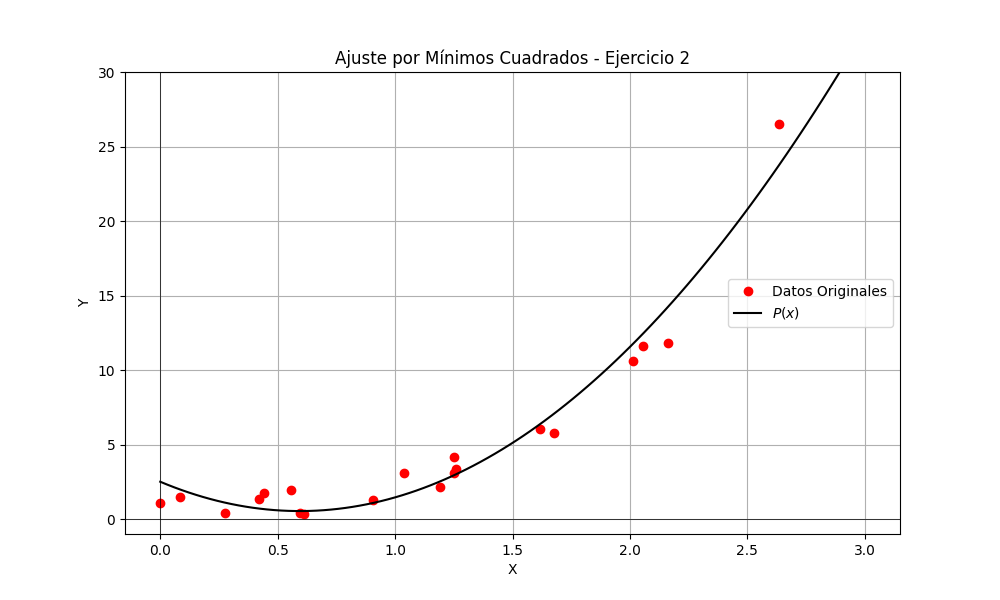

In [11]:
def funcion_ajustada(x):
    return 2.5068 - 6.6227*x + 5.5732*x**2

from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt

x0_values = np.linspace(0, 3, 100)

y0_f = [funcion_ajustada(x) for x in x0_values]

x_puntos = np.array([0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367, 
                     1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344])
y_puntos = np.array([1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239, 
                     2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077])

plt.figure(figsize=(10, 6))

plt.plot(
    x_puntos,
    y_puntos,
    'ro',
    markersize=6,
    label='Datos Originales'
)

plt.plot(x0_values, y0_f, label='$P(x)$', color='black', linestyle = '-')

plt.title('Ajuste por Mínimos Cuadrados - Ejercicio 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.ylim(-1,30)
plt.legend()
plt.show()